In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
df = pd.read_csv("/data/cleaned/processed_raw_CareerMapping1_with_scores.csv")

In [17]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [18]:
y = df['Role_encoded']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(f"Số lượng mẫu ban đầu của tập Train: {Counter(y_train)}")

Số lượng mẫu ban đầu của tập Train: Counter({13: 328, 0: 312, 2: 272, 11: 249, 7: 219, 12: 210, 5: 199, 3: 198, 10: 187, 9: 182, 6: 181, 15: 170, 14: 169, 4: 142, 1: 141, 8: 133})


In [21]:
smote = SMOTE(random_state=42)

In [22]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [23]:
print(f"Số lượng mẫu sau khi SMOTE: {Counter(y_train_resampled)}")

Số lượng mẫu sau khi SMOTE: Counter({2: 328, 15: 328, 3: 328, 11: 328, 9: 328, 13: 328, 0: 328, 6: 328, 10: 328, 8: 328, 7: 328, 14: 328, 12: 328, 5: 328, 1: 328, 4: 328})


In [24]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

,criterion,'entropy'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
y_pred = dt_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Decision Tree's acc: {acc}")

Decision Tree's acc: 0.7609223300970874


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        68
           1       0.68      0.64      0.66        39
           2       0.84      0.77      0.80        81
           3       0.76      0.82      0.79        65
           4       0.68      0.68      0.68        25
           5       0.78      0.72      0.75        40
           6       0.74      0.74      0.74        57
           7       0.68      0.71      0.70        45
           8       0.76      0.68      0.72        47
           9       0.58      0.76      0.66        41
          10       0.57      0.71      0.63        34
          11       0.83      0.74      0.78        58
          12       0.85      0.88      0.86        50
          13       0.96      0.84      0.90        87
          14       0.74      0.73      0.74        48
          15       0.61      0.79      0.69        39

    accuracy                           0.76       824
   macro avg       0.75   

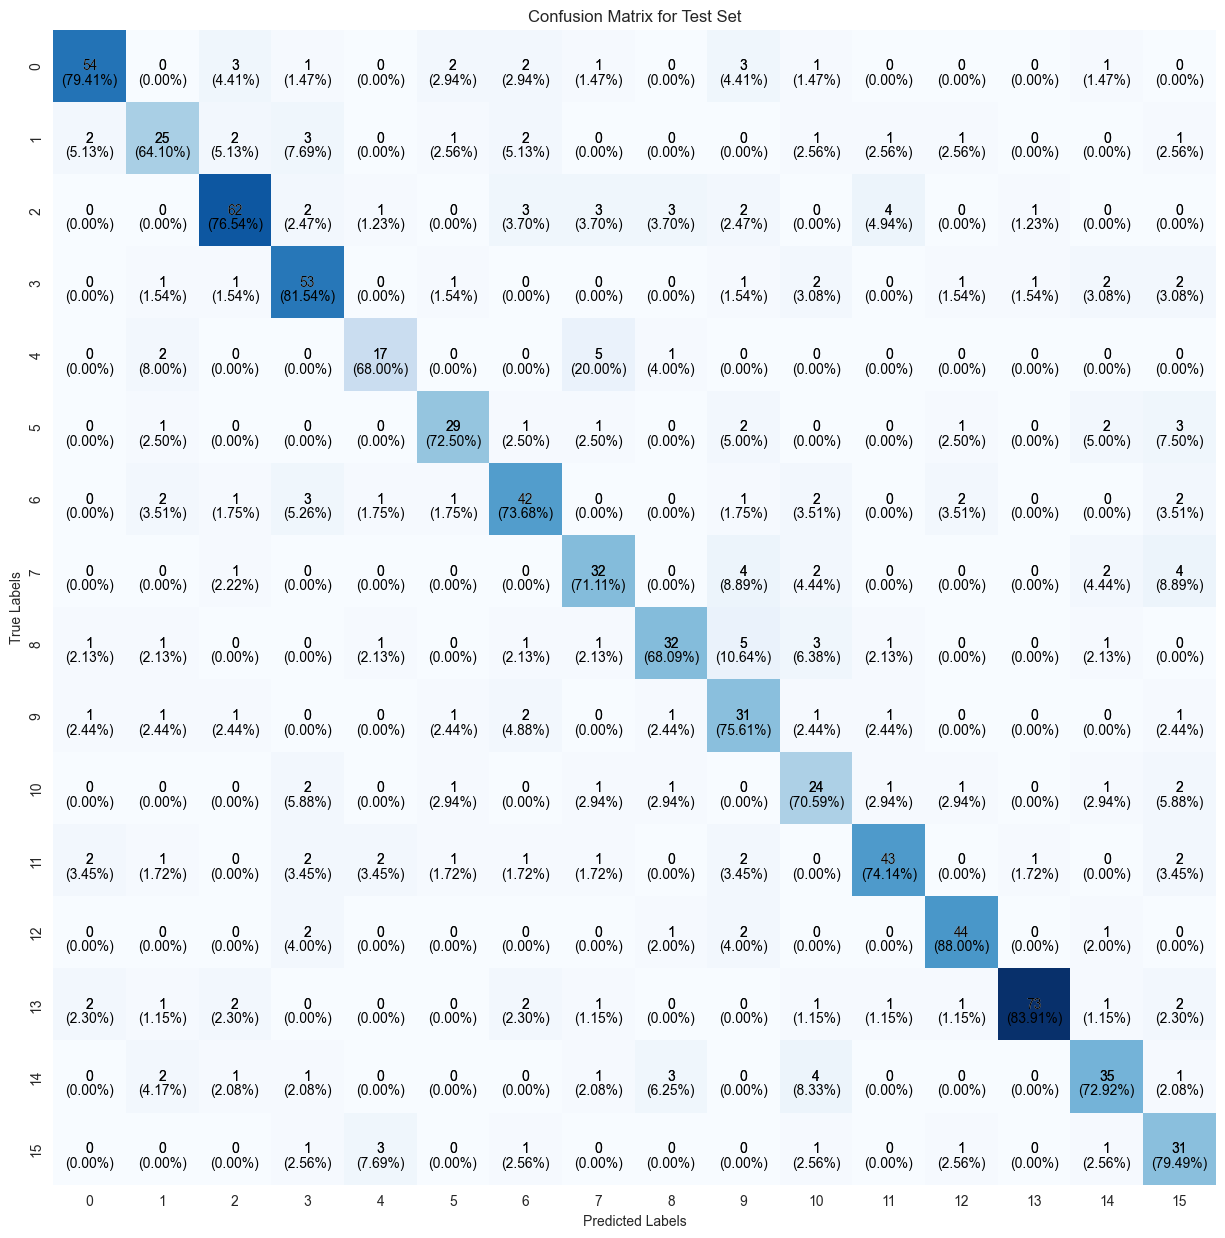

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [28]:
feature_imp = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 5 Yếu tố quan trọng nhất đối với Decision Tree:")
print(feature_imp.head(5))


Top 5 Yếu tố quan trọng nhất đối với Decision Tree:
Self-transcendence    0.100797
Openness              0.078543
soft_skill_score      0.072811
Self-enhancement      0.072757
Agreeableness         0.070908
dtype: float64


-------------------------------------------------------------------------------------------------------------------------------------

In [31]:
df = pd.read_csv("/data/cleaned/processed_raw_CareerMapping1.csv")

In [32]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [33]:
y = df['Role_encoded']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print(f"Số lượng mẫu ban đầu của tập Train: {Counter(y_train)}")

Số lượng mẫu ban đầu của tập Train: Counter({13: 328, 0: 312, 2: 272, 11: 249, 7: 219, 12: 210, 5: 199, 3: 198, 10: 187, 9: 182, 6: 181, 15: 170, 14: 169, 4: 142, 1: 141, 8: 133})


In [36]:
smote = SMOTE(random_state=42)

In [37]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [38]:
print(f"Số lượng mẫu sau khi SMOTE: {Counter(y_train_resampled)}")

Số lượng mẫu sau khi SMOTE: Counter({2: 328, 15: 328, 3: 328, 11: 328, 9: 328, 13: 328, 0: 328, 6: 328, 10: 328, 8: 328, 7: 328, 14: 328, 12: 328, 5: 328, 1: 328, 4: 328})


In [39]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

,criterion,'entropy'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [40]:
y_pred = dt_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Decision Tree's acc: {acc}")

Decision Tree's acc: 0.779126213592233


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        68
           1       0.65      0.62      0.63        39
           2       0.81      0.79      0.80        81
           3       0.79      0.80      0.79        65
           4       0.64      0.64      0.64        25
           5       0.68      0.75      0.71        40
           6       0.82      0.72      0.77        57
           7       0.81      0.76      0.78        45
           8       0.84      0.66      0.74        47
           9       0.67      0.76      0.71        41
          10       0.69      0.79      0.74        34
          11       0.98      0.79      0.88        58
          12       0.86      0.86      0.86        50
          13       0.94      0.83      0.88        87
          14       0.66      0.79      0.72        48
          15       0.60      0.85      0.70        39

    accuracy                           0.78       824
   macro avg       0.77   

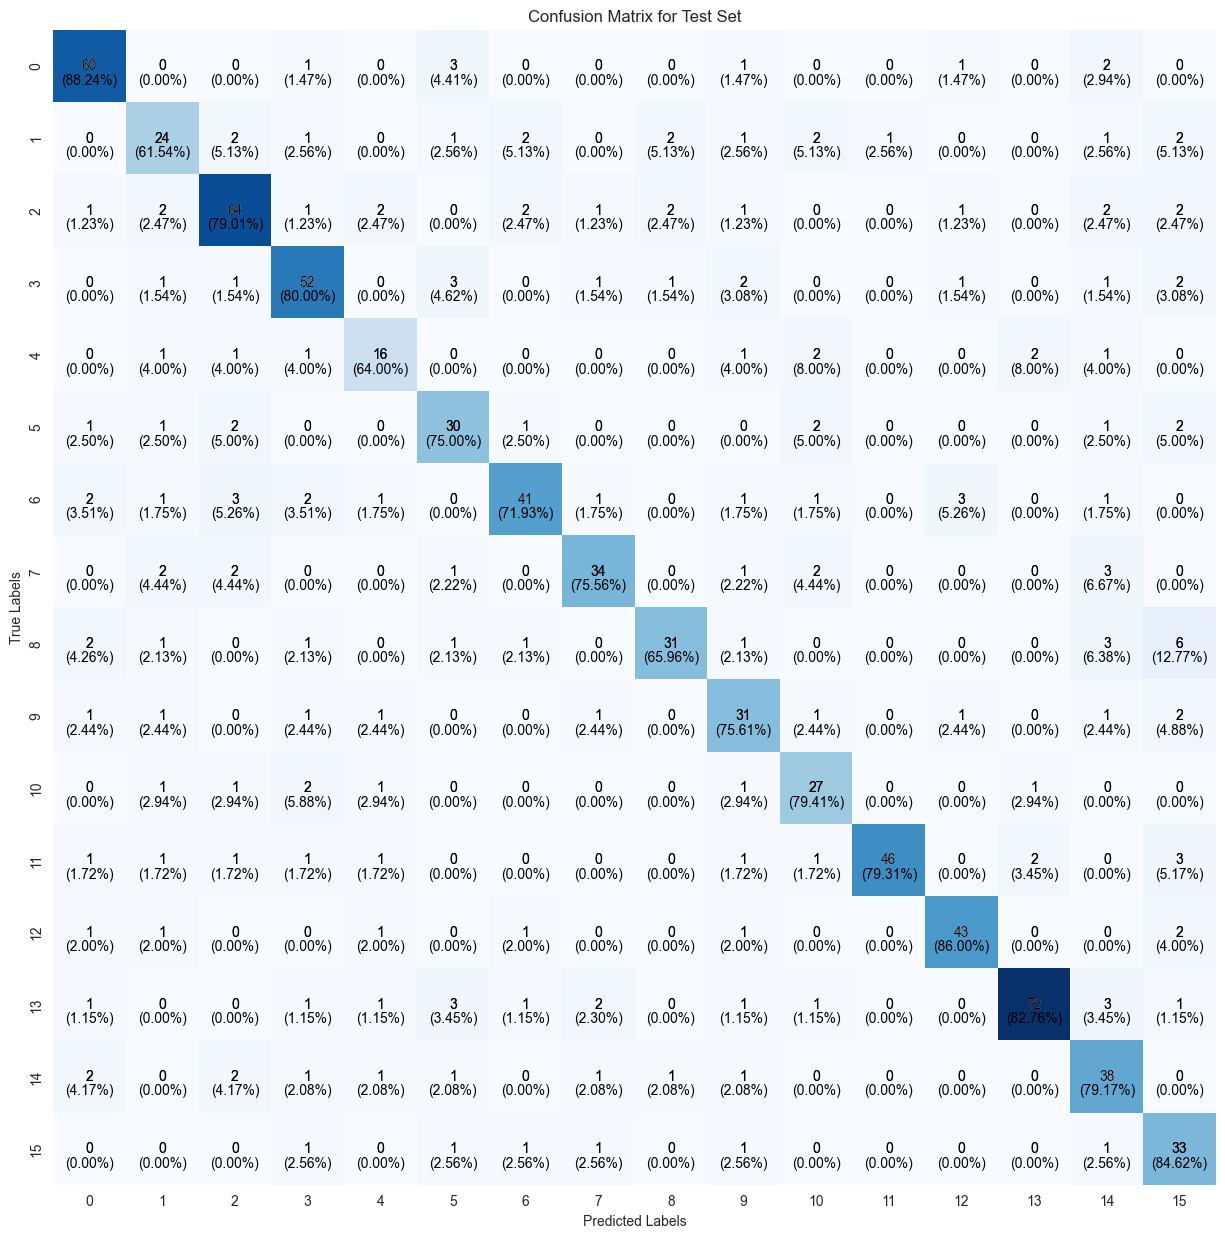

In [42]:
conf_matrix = confusion_matrix(y_test, y_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [43]:
feature_imp = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 5 Yếu tố quan trọng nhất đối với Decision Tree:")
print(feature_imp.head(5))


Top 5 Yếu tố quan trọng nhất đối với Decision Tree:
Self-transcendence    0.124528
Conversation          0.088978
Openness              0.088216
Programming Skills    0.082231
Agreeableness         0.078033
dtype: float64
